# This notebook contains Timing for the codes written for this project

In [9]:
from __future__ import print_function, division   
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import time
from numba import njit, prange
%matplotlib inline

In [10]:
def LU_solve(n):
    dim = n
    h = 1/dim
    matrix = np.zeros((dim,dim))
    a = -np.ones(dim)
    a[0] = 0
    b = 2*np.ones(dim)
    c = -np.ones(dim)
    c[-1] = 0    
    f = np.ones(dim)
    j = 0
    while j <= dim-1:
        f[j] = 100*np.exp(-10*j*h)*h**2
        j += 1
    for x in range(0, dim):
        matrix[x][x] = 2.0
    for x in range(1, dim):
        matrix[x][x-1] = -1.0  
    for x in range(0, dim-1):
        matrix[x][x+1] = -1.0
    start = time.perf_counter()
    LU = linalg.lu_factor(matrix)
    x = linalg.lu_solve(LU, f)
    end = time.perf_counter()
    print(end - start)

In [ ]:
LU_solve_time = []
LU_solve(10)

In [4]:
def Lin_alg(n):
    dim = n
    A = 2*np.diag(np.ones(dim)) -np.diag(np.ones(dim-1), 1) - np.diag(np.ones(dim-1), -1)
    
    f = np.ones(dim)
    j = 0
    h = 1/dim
    while j < dim:
        f[j] = 100*np.exp(-10*j*h)*h**2
        j+=1
        
    a = np.linalg.solve(A,f)
    a[0]=0
    a[-1] =0
    
    return a

In [5]:
def tridag(n):
    dim = n
    h = 1/dim
    d = np.ones(dim+1)
    b = np.ones(dim+1)
    sol = np.ones(dim+1)
    d[0]=2
    d[dim]=2
    sol[0]=0
    sol[dim]=0
    
    i = 1
    while i < dim:
        d[i] = (i+1.)/i
        i+=1
    j = 0    
    while j <= dim:
        b[j] = 100*np.exp(-10*j*h)*h**2
        j+=1
    
    for i in range(2,dim):
        b[i] = b[i] + (b[i-1]/d[i-1])
        
    sol[dim-1] = b[dim-1]/d[dim-1]
    
    for j in range(dim-2,0,-1):
        sol[j] = (b[j]+sol[j+1])/d[j]
        
    return sol

In [6]:
@njit(parallel = True)
def tridag_numba(n):
    dim = n
    h = 1/dim
    d = np.ones(dim+1)
    b = np.ones(dim+1)
    sol = np.ones(dim+1)
    x = np.ones(dim+1)
    d[0]=2
    d[dim]=2
    sol[0]=0
    sol[dim]=0
    
    i = 1
    while i < dim:
        d[i] = (i+1.)/i
        i+=1
    j = 0    
    while j <= dim:
        x[j] = j*h
        b[j] = 100*np.exp(-10*x[j])*h**2
        j+=1
    
    for i in prange(2,dim):
        b[i] = b[i] + (b[i-1]/d[i-1])
    sol[dim-1] = b[dim-1]/d[dim-1]
    for j in range(dim-2,0,-1):
        sol[j] = (b[j]+sol[j+1])/d[j]
        
    return sol

NameError: name 'njit' is not defined

In [27]:
#General Algorithm!
def TriSolve(a,b,c,f,dim):
    u = np.zeros(dim)
    for i in range(1, dim):
        b[i] -= a[i]*c[i-1]/b[i-1]
        f[i] -= a[i]*f[i-1]/b[i-1]
    u[-1] = f[-1]/b[-1]
    for i in range(dim-1,0,-1):
        u[i-1] = (f[i-1] - c[i-1]*u[i])/b[i-1]
    return u

def main():
    dim = 1000
    h = 1/dim
    a = -np.ones(dim)
    a[0] = 0
    b = 2*np.ones(dim)
    c = -np.ones(dim)
    c[-1] = 0    
    f = np.ones(dim)
    j = 0
    while j <= dim-1:
        f[j] = 100*np.exp(-10*j*h)*h**2
        j += 1

    start = time.perf_counter()   
    calculated = TriSolve(a,b,c,f,dim)
    end = time.perf_counter()
#     print(end - start)
    return calculated

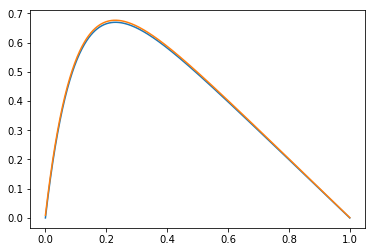

In [28]:
x = np.linspace(0,1,1000)
ans = 1 - (1 - np.exp(-10))*x - np.exp(-10*x)
plt.plot(x,ans)
plt.plot(x,main())